## Econ 430
### UCLA, Master of Quantitative Economics
#### Dr. Randall R. Rojas

# Multiple  Regression

## 1) Inspect the data

In [1]:
# Load Modules and Functions
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wooldridge as woo

# Load the data:
df = woo.dataWoo('gpa1')

# Check the data object type
print(type(df))

# Look at the data 
print(df.head())

# Statistical summary of the data
print(df.describe())
# Q: Which indicator variables might be problematic? Why?

# Check the variables' types
print(df.info())

# Look for any missing observations
print(df.isnull().any())

# Extra sanity check, count the number of many missing obs per variable (if any)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
   age  soph  junior  senior  senior5  male  campus  business  engineer  \
0   21     0       0       1        0     0       0         1         0   
1   21     0       0       1        0     0       0         1         0   
2   20     0       1       0        0     0       0         1         0   
3   19     1       0       0        0     1       1         1         0   
4   20     0       1       0        0     0       0         1         0   

   colGPA  ...  greek  car  siblings  bgfriend  clubs  skipped  alcohol  \
0     3.0  ...      0    1         1         0      0      2.0      1.0   
1     3.4  ...      0    1         0         1      1      0.0      1.0   
2     3.0  ...      0    1         1         0      1      0.0      1.0   
3     3.5  ...      0    0         1         0      0      0.0      0.0   
4     3.6  ...      0    1         1         1      0      0.0      1.5   

   gradMI  fathcoll  mothcoll  
0       1         0         

## 2) Look at the distributions of the variables

/Users/randallr.rojas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


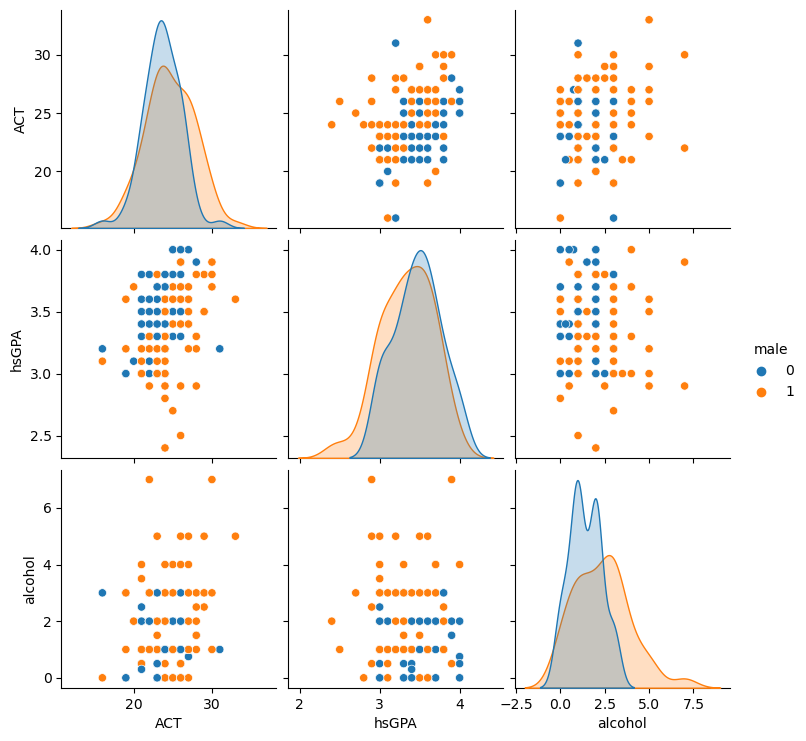

In [2]:
import seaborn as sns
sns.pairplot(df,vars=['ACT', 'hsGPA','alcohol'], hue =  'male')

## 3) Look at the correlation plot

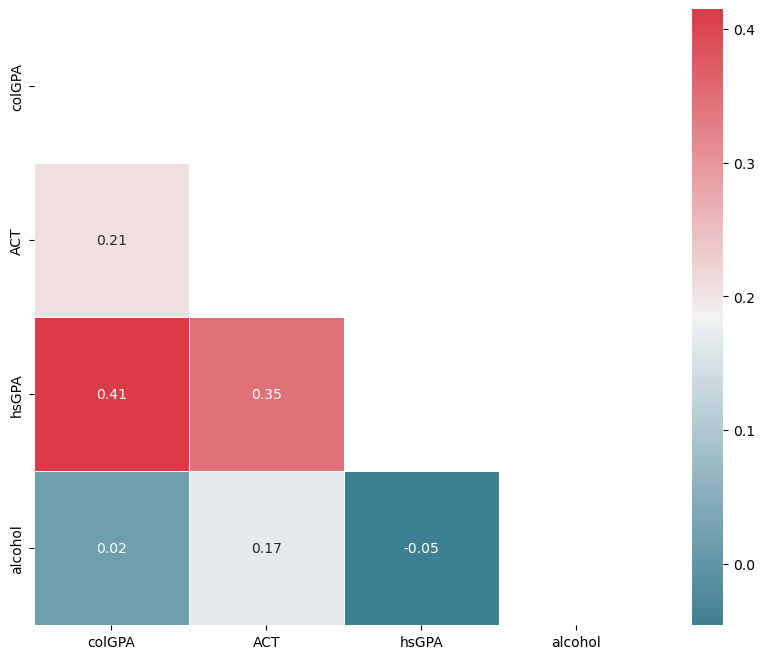

In [3]:
sub_df =  df[["colGPA", "ACT", "hsGPA", "alcohol"]]
corr = sub_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

## 4) Fit a Multiple Regression Model

In [6]:
# Specify the Model
mr_mod = smf.ols(formula='colGPA ~ hsGPA + ACT + alcohol', data=df)

# Fit the Model
mr_fit = mr_mod.fit()
# Type: dir(ols_fit) to look at other accessible attributes

# Look at the Model Fit Summary
print(mr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     9.819
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           6.56e-06
Time:                        09:13:10   Log-Likelihood:                -46.526
No. Observations:                 141   AIC:                             101.1
Df Residuals:                     137   BIC:                             112.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2787      0.343      3.729      0.0

D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


In [7]:
from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer(method='box-cox')
#data3 = pt.fit_transform(df[:, :-1])
pt = PowerTransformer()
data3 = pt.fit_transform(df)
print(pt.lambdas_)

[-6.28174862e+00 -6.78066654e+01 -2.09614098e+00  6.13931056e-02
 -1.56443798e+01  4.30375887e-01 -8.32263095e+00  6.69771697e+00
 -4.06840008e+01 -5.15974551e-01  2.52824810e+00  8.95710005e-01
 -1.56461843e+00 -8.32263095e+00 -6.69771717e+00 -2.51277599e+00
 -1.17936406e+00 -6.16579536e+00 -1.82741907e+00 -3.41181789e+00
  5.91846148e+00  2.26021667e+01 -4.30375798e-01  1.82741907e+00
 -2.38707187e-01  2.44741679e-01  1.12652448e+01  1.56461837e+00
  6.77784330e-01]


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [8]:
print(pt.transform(data3))

[[-1.66712974e+08 -9.94645868e+04 -1.42589341e+01 ... -2.56846367e+00
  -2.71998012e+00 -3.88642315e+00]
 [-1.66712974e+08 -9.94645868e+04 -1.42589341e+01 ... -2.56846367e+00
   4.51142336e-01  7.87593138e-01]
 [-1.03448563e+11 -9.94645868e+04  1.41539084e+00 ... -2.56846367e+00
   4.51142336e-01  7.87593138e-01]
 ...
 [-1.03448563e+11 -9.94645868e+04  1.41539084e+00 ... -2.56846367e+00
  -2.71998012e+00 -3.88642315e+00]
 [-1.03448563e+11 -9.94645868e+04  1.41539084e+00 ... -2.56846367e+00
  -2.71998012e+00  7.87593138e-01]
 [-1.66712974e+08 -9.94645868e+04 -1.42589341e+01 ... -2.56846367e+00
   4.51142336e-01  7.87593138e-01]]


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


## 5) Look at the diagnostic plots

eval_env: 1


D:\Anaconda\lib\site-packages\statsmodels\graphics\regressionplots.py:429: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


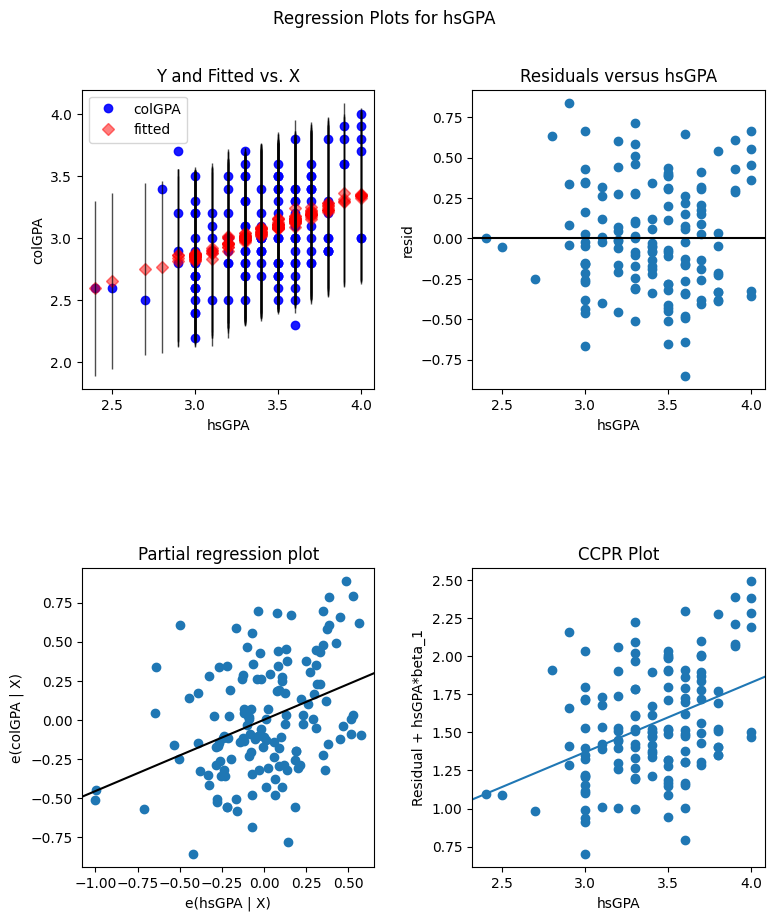

In [9]:
fig = sm.graphics.plot_regress_exog(mr_fit, "hsGPA")
fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

[Text(0.5, 36.72222222222221, 'Predicted'),
 Text(400.9040404040403, 0.5, 'Residuals')]

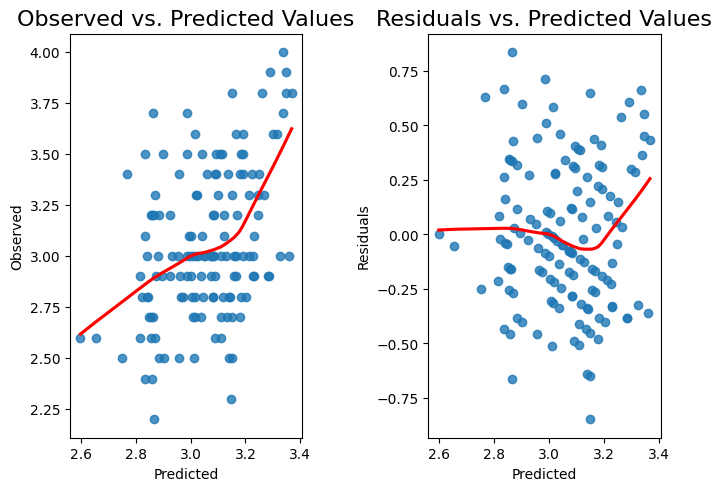

In [10]:
# Plot y vs y_hat
fig, ax = plt.subplots(1,2,figsize=(8, 6))
fig.tight_layout(pad=6.0)
sns.regplot(x=mr_fit.fittedvalues, y=df['colGPA'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=mr_fit.fittedvalues, y=mr_fit.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

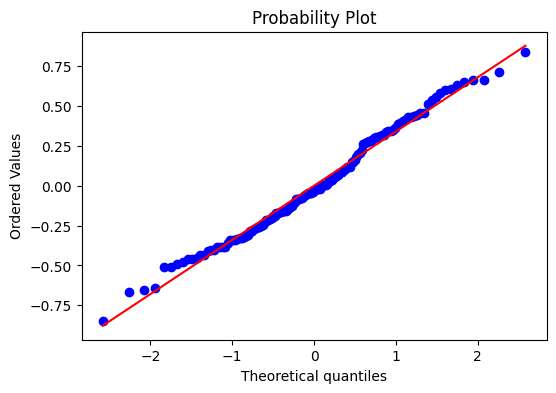

In [11]:
# QQ Plot (Normal Probability) 
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(mr_fit.resid, plot = axA, fit=True)

## Note: statsmodels 
If you would like to replicate the results from lecture based on Duncan's Prestige Dataset, see [statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html). Also, you can load and R dataset with `datasets.get_rdataset` also from `statsmodels`.

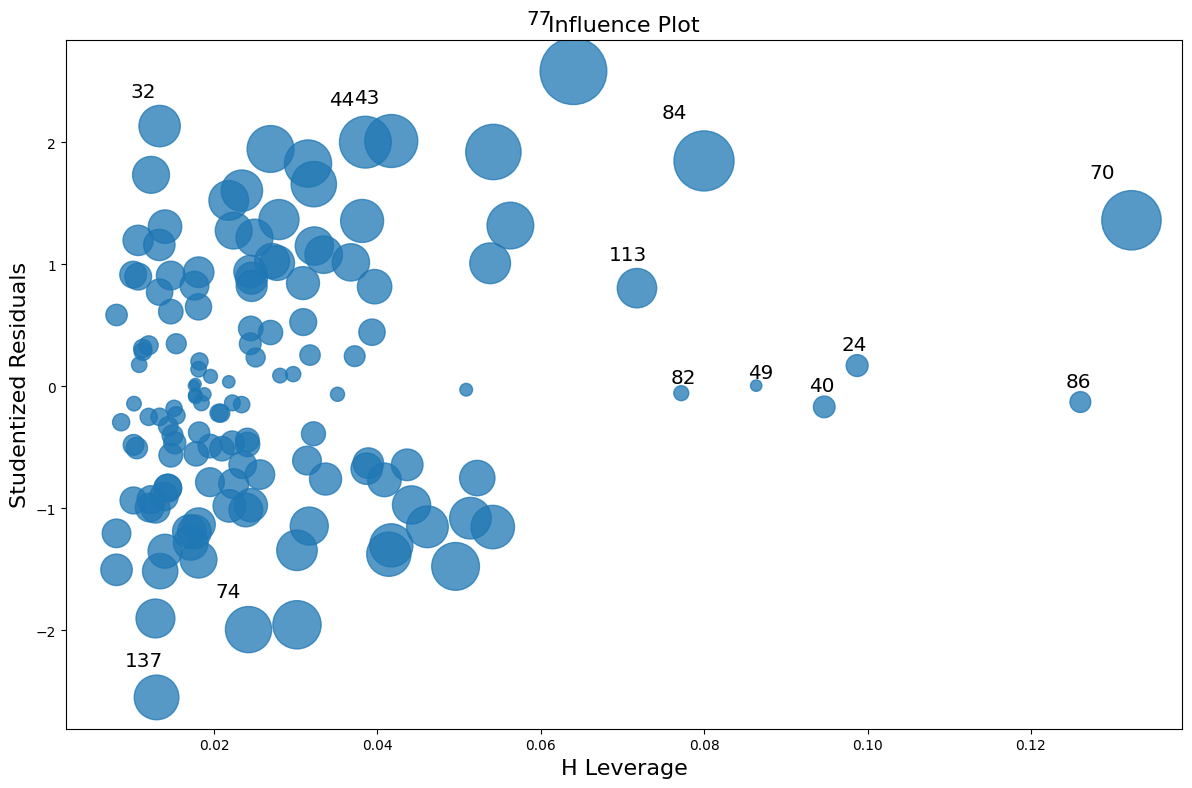

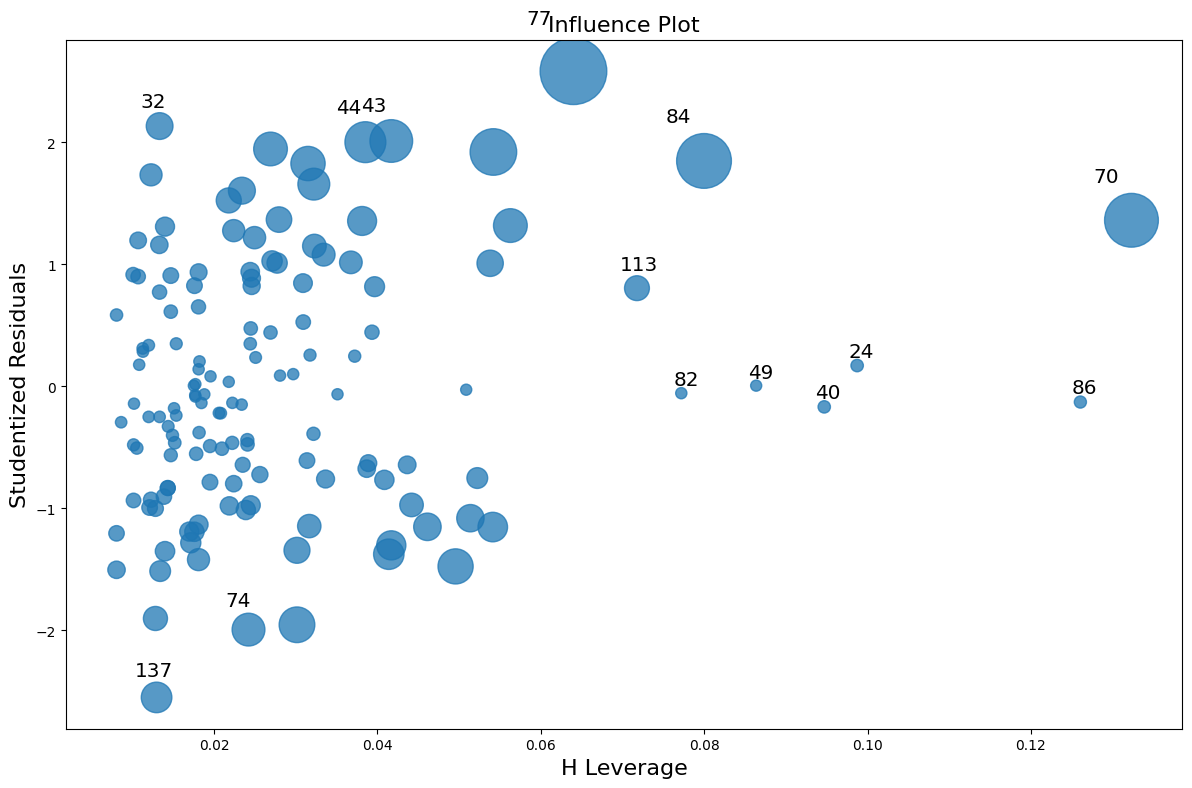

In [12]:
# Outliers, high leverage, influential obs
figd, ax = plt.subplots(figsize=(12,8))
figd = sm.graphics.influence_plot(mr_fit, ax = ax, criterion="DFFITS")
figd.tight_layout(pad=1.0)

fige, ax = plt.subplots(figsize=(12,8))
fige = sm.graphics.influence_plot(mr_fit, ax = ax, criterion="cooks")
fige.tight_layout(pad=1.0)

## 6) Look at modeling/inference issues

In [13]:
# VIF: Test for multicolinearity
import statsmodels.stats.outliers_influence as smo
import patsy as pt

# extract matrices using patsy:
y, X = pt.dmatrices('colGPA ~ hsGPA + ACT + alcohol',
                    data=df, return_type='dataframe')

# get VIF:
K = X.shape[1]
VIF = np.empty(K)
for i in range(K):
    VIF[i] = smo.variance_inflation_factor(X.values, i)
print(f'VIF: \n{VIF}\n')
# VIF values are low enough that multicolinearity does not seem to be ann issue

VIF: 
[142.19442956   1.15044419   1.18179548   1.04266223]



D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_d

In [18]:
# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
import statsmodels.stats.api as sms
from simple_colors import *
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(mr_fit.resid, mr_fit.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))
# Fail to reject Ho, therefore, heteroskedasticity does not appear to be an issue.

BP Results:
[('Lagrange multiplier statistic', 1.1124095297068504), ('p-value', 0.774079249949149), ('f-value', 0.36314897568226007), ('f p-value', 0.7797099382124923)]


In [19]:
# Model Misspecification
import statsmodels.regression.linear_model as rg
import statsmodels.stats.diagnostic as dg

test =  dg.linear_reset(mr_fit, power=2,  test_type='fitted', use_f = True)

print(blue("Ramsey-RESET:",['bold']))
print(test)
# Fail to reject Ho, therefore, the model seems to be correctly specified at order 2.

# Note: We can do an added sanity check by estimating two more models: 

#(a) include a quadratic term
print(blue("Quadratic Model",['bold']))
smf.ols(formula='colGPA ~ hsGPA + ACT + alcohol + I(hsGPA**2)', data = df).fit().summary()

print('')

#(a) include an interation term
print(blue("Interaction Model",['bold']))
smf.ols(formula='colGPA ~ hsGPA + ACT + alcohol + hsGPA*alcohol', data = df).fit().summary()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [ ]:
import statsmodel.stats.outliers_influence as oi
regression = sm.OLS(y,X)
result = regression.fit()
test = oi.reset_ramsey(result,degree)

## 7) Prediction vs. Confidence Intervals

0.0
0.0
0.0


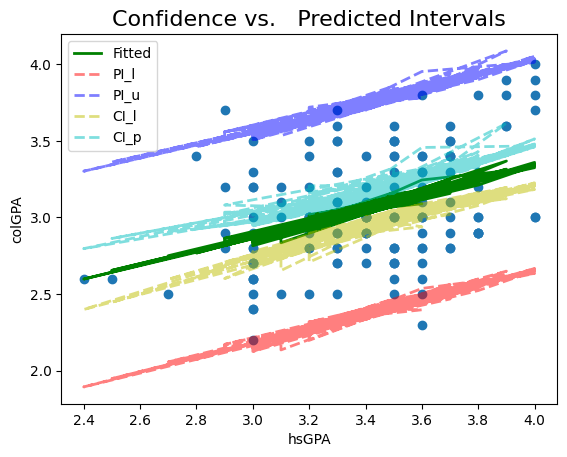

In [16]:
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np
st, data, ss2 = summary_table(mr_fit, alpha=0.05)
prstd, iv_l, iv_u = wls_prediction_std(mr_fit)
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

# Check we got the right things
print(np.max(np.abs(mr_fit.fittedvalues - fittedvalues)))
print(np.max(np.abs(iv_l - predict_ci_low)))
print(np.max(np.abs(iv_u - predict_ci_upp)))
x = df['hsGPA']
y =  df['colGPA']
plt.plot(x, y, 'o')
plt.plot(x, fittedvalues, 'g-', lw=2, label = 'Fitted')
plt.plot(x, predict_ci_low, 'r--', lw=2,label ='PI_l', alpha = 0.5)
plt.plot(x, predict_ci_upp, 'b--', lw=2,label = 'PI_u', alpha = 0.5)
plt.plot(x, predict_mean_ci_low, 'y--', lw=2, label ='CI_l', alpha = 0.5)
plt.plot(x, predict_mean_ci_upp, 'c--', lw=2, label ='CI_p', alpha = 0.5)
plt.title('Confidence vs.   Predicted Intervals', fontsize=16)
plt.xlabel('hsGPA')
plt.ylabel('colGPA')
plt.legend()
plt.show()


In [17]:
data


array([[ 1.00000000e+00,  3.00000000e+00,  2.83957118e+00, ...,
         3.37233180e-01,  4.75720749e-01,  1.42120669e-03],
       [ 2.00000000e+00,  3.40000010e+00,  2.95723177e+00, ...,
         3.39042580e-01,  1.30593723e+00,  6.05745826e-03],
       [ 3.00000000e+00,  3.00000000e+00,  3.15746967e+00, ...,
         3.38837767e-01, -4.64734695e-01,  8.33329485e-04],
       ...,
       [ 1.39000000e+02,  2.79999995e+00,  3.01774832e+00, ...,
         3.37403968e-01, -6.45363966e-01,  2.50751508e-03],
       [ 1.40000000e+02,  3.40000010e+00,  3.22251220e+00, ...,
         3.36121191e-01,  5.28047337e-01,  2.22465205e-03],
       [ 1.41000000e+02,  2.79999995e+00,  3.04444511e+00, ...,
         3.37039831e-01, -7.25270833e-01,  3.45805530e-03]])

## 8) Robust Estimation

In [20]:
# Compare the traditional SE vs. the  White SE
mr_mod = smf.ols(formula='colGPA ~ hsGPA + ACT + alcohol', data=df)

# estimate default model (only for spring data):
results_default = mr_mod.fit()

table_default = pd.DataFrame({'b': round(results_default.params, 5),
                              'se': round(results_default.bse, 5),
                              't': round(results_default.tvalues, 5),
                              'pval': round(results_default.pvalues, 5)})
print(f'Default Estimatws & Std. Errors: \n{table_default}\n')

# estimate model with White SE (only for spring data):
results_white = mr_mod.fit(cov_type='HC1')

table_white = pd.DataFrame({'b': round(results_white.params, 5),
                            'se': round(results_white.bse, 5),
                            't': round(results_white.tvalues, 5),
                            'pval': round(results_white.pvalues, 5)})
print(f'White Estimaets & Std. Errors: \n{table_white}\n')


Default Estimatws & Std. Errors: 
                 b       se        t     pval
Intercept  1.27871  0.34289  3.72925  0.00028
hsGPA      0.45674  0.09675  4.72099  0.00001
ACT        0.00877  0.01103  0.79521  0.42787
alcohol    0.00646  0.02143  0.30120  0.76372

White Estimaets & Std. Errors: 
                 b       se        t     pval
Intercept  1.27871  0.35813  3.57052  0.00036
hsGPA      0.45674  0.09857  4.63372  0.00000
ACT        0.00877  0.01096  0.79992  0.42376
alcohol    0.00646  0.02303  0.28028  0.77926



D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


##  9) Weighted Least-Squares (known form of the variance)

In [21]:
# Estimate model:
mr_mod = smf.ols(formula='colGPA ~ hsGPA + ACT + alcohol', data=df)

results_ols= mr_mod.fit(cov_type='HC0')

table_ols = pd.DataFrame({'b': round(results_ols.params, 4),
                          'se': round(results_ols.bse, 4),
                          't': round(results_ols.tvalues, 4),
                          'pval': round(results_ols.pvalues, 4)})
print(f'table_ols: \n{table_ols}\n')

# WLS: here we use w = 1/x
wls_weight = list(1 / df['hsGPA'])
reg_wls = smf.wls(formula='colGPA ~ hsGPA + ACT + alcohol',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()

# print regression table:
table_wls = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'table_wls: \n{table_wls}\n')

table_ols: 
                b      se       t    pval
Intercept  1.2787  0.3530  3.6223  0.0003
hsGPA      0.4567  0.0972  4.7009  0.0000
ACT        0.0088  0.0108  0.8115  0.4171
alcohol    0.0065  0.0227  0.2843  0.7761

table_wls: 
                b      se       t    pval
Intercept  1.3358  0.3368  3.9660  0.0001
hsGPA      0.4423  0.0940  4.7080  0.0000
ACT        0.0086  0.0109  0.7871  0.4326
alcohol    0.0048  0.0212  0.2255  0.8219



D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_d

##  10) Feasible Generalized Least-Squares (unknown form of the variance)

In [22]:
# estimate model:
mr_mod = smf.ols(formula='colGPA ~ hsGPA + ACT + alcohol', data=df)

results_ols= mr_mod.fit()

# FGLS (estimation of the variance function):
df['logu2'] = np.log(results_ols.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ hsGPA + ACT + alcohol', data=df)
results_fgls = reg_fgls.fit()
table_fgls = pd.DataFrame({'b': round(results_fgls.params, 4),
                           'se': round(results_fgls.bse, 4),
                           't': round(results_fgls.tvalues, 4),
                           'pval': round(results_fgls.pvalues, 4)})
print(f'FGLS (Variance Function): \n{table_fgls}\n')

# FGLS (WLS):
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='colGPA ~ hsGPA + ACT + alcohol',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()
table_wls = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'FGLS Estimates: \n{table_wls}\n')

FGLS (Variance Function): 
                b      se       t    pval
Intercept -9.5604  2.2352 -4.2771  0.0000
hsGPA      1.9063  0.6307  3.0226  0.0030
ACT       -0.0151  0.0719 -0.2102  0.8338
alcohol    0.0268  0.1397  0.1918  0.8482

FGLS Estimates: 
                b      se       t    pval
Intercept  1.4892  0.3266  4.5597  0.0000
hsGPA      0.4033  0.0818  4.9298  0.0000
ACT        0.0084  0.0104  0.8078  0.4206
alcohol   -0.0053  0.0200 -0.2659  0.7907



D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_d

In [23]:
#### Applying FGLS to the 'food' data
food = pd.read_csv('food.csv')
mols = smf.ols('food_exp ~ income', data = food).fit()

ehatsq = mols.resid**2
sigols  = smf.ols('np.log(ehatsq) ~ np.log(income)', data = food).fit()

vari = np.exp(sigols.fittedvalues) 

w = 1/vari**2

fgls = smf.wls('food_exp ~ income', weights = w, data = food).fit()
print(sigols.summary())

FileNotFoundError: [Errno 2] No such file or directory: 'food.csv'

In [ ]:
# Goldfeld-Quandt test with two groups

import scipy.stats as stats # Statistics

cps5_small = pd.read_csv('cps5_small.csv')

alpha = 0.05 # Two tail, will take alpha/2

# Create the two groups, m (metro) and r (rural)

m = cps5_small[cps5_small.metro == 1]

r = cps5_small[cps5_small.metro == 0]

wg1 = smf.ols('wage ~ educ + exper', data = m).fit()

wg0 = smf.ols('wage ~ educ + exper', data = r).fit()

df1 = wg1.df_resid # Numerator degrees of freedom

df0 = wg0.df_resid # Denominatot df

sig1squared = wg1.scale**2

sig0squared = wg0.scale**2

fstat = sig1squared / sig0squared
print('F_stat =',round(fstat,2))

Flc = stats.f.ppf(alpha/2, df1, df0) # Left critical F
print('F_lc =', round(Flc,2))

Fuc = stats.f.ppf(1-alpha/2, df1, df0) # Right critical F
print('F_uc =', round(Fuc,2))

#  Mallows Cp
See [regstore](https://pypi.org/project/RegscorePy/). You need to install `RegscorePy`.

`pip install RegscorePy`. 

For stepwise regression, please see this [lab](http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html). Finally, for general regression plots, etc., you can go to [statsmodels](https://www.statsmodels.org/stable/examples/index.html#glm).

In [ ]:
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wooldridge as woo
from RegscorePy import *
df = woo.dataWoo('gpa1')
mr_mod = smf.ols(formula='colGPA ~ hsGPA + ACT + alcohol', data=df)
mr_fit = mr_mod.fit()
y = df['colGPA']
y_pred=mr_fit.fittedvalues

# You need to run each sub regression individually, and get the score for each subset
# Using subset size =1
mr_sub = smf.ols(formula='colGPA ~ ACT', data=df)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 5 # number of parameters in orginal model (includes y-intercept)
p = 2 # number of parameters in the subset model (includes y-intercept)
mallow.mallow(y, y_pred,y_sub, k, p)